In [1]:
from assess_property.read_data import ReadAllYears
from assess_property.preprocess import RemoveOutlier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import describe

# Read and format csvs from disk 

In [2]:
yrs = range(2014,2024)
vnames = ["PID", "YR_REMODEL", "YR_BUILT", "LIVING_AREA", "LU", "ZIPCODE", "TOTAL_VALUE","YEAR"]
reader = ReadAllYears(yrs, vnames)
reader.read_all_years()

100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


In [3]:
reader.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731192 entries, 0 to 1731191
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PID          object 
 1   YR_BUILT     float64
 2   LIVING_AREA  float64
 3   LU           object 
 4   ZIPCODE      object 
 5   TOTAL_VALUE  float64
 6   YEAR         int64  
 7   YR_REMODEL   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 105.7+ MB


In [4]:
print(reader.df.head())

          PID  YR_BUILT  LIVING_AREA  LU ZIPCODE  TOTAL_VALUE  YEAR  \
0  2205670000    1900.0        630.0   E   02135    1680000.0  2014   
1  2205669000    1947.0       7260.0   C   02135    1769500.0  2014   
2  2205668000    1920.0       2834.0  R3   02135     604700.0  2014   
3  2205667000       0.0          0.0  RL   02135      40600.0  2014   
4  2205666000       0.0          0.0   E   02135     159700.0  2014   

   YR_REMODEL  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


# Remove outliers

In [5]:
remover = RemoveOutlier(reader.df)
remover.run()

# Visualize feature distributions

Distribution of year built

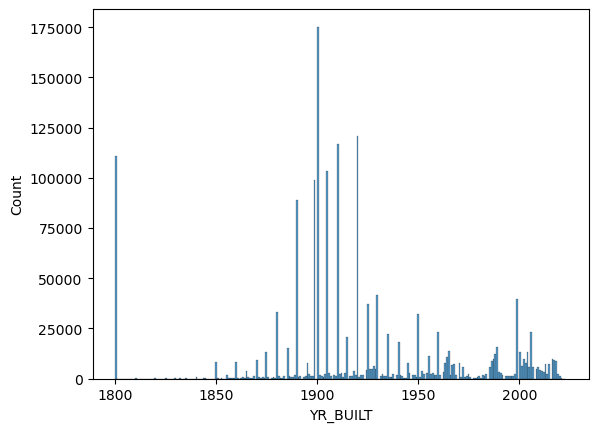

In [6]:
sns.histplot(data = remover.df[remover.df["YR_BUILT"].notnull()],
             x = "YR_BUILT")
plt.show()

Distribution of year since remodeled

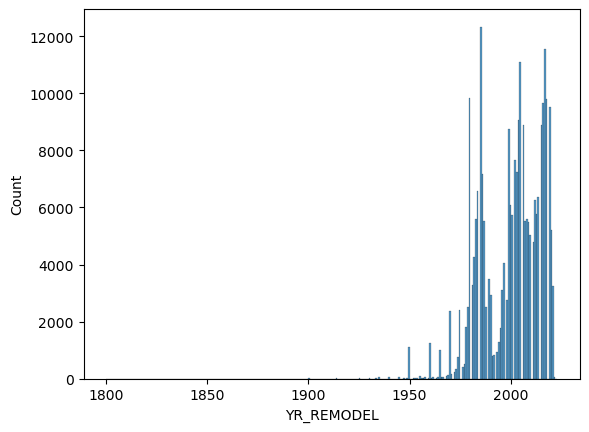

In [7]:
sns.histplot(data = remover.df[remover.df["YR_REMODEL"].notnull()],
             x = "YR_REMODEL")
plt.show()

# Focus on R1

In [9]:
remover.df[remover.df["LU"] == "R1"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305699 entries, 9 to 1731182
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PID          305699 non-null  object 
 1   YR_BUILT     305669 non-null  float64
 2   LIVING_AREA  305692 non-null  float64
 3   LU           305699 non-null  object 
 4   ZIPCODE      305699 non-null  object 
 5   TOTAL_VALUE  305699 non-null  float64
 6   YEAR         305699 non-null  int64  
 7   YR_REMODEL   37158 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 21.0+ MB


# Number of parcels

number of parcels
- over 250k parcels

In [ ]:
print(len(reader.df["PID"].unique()))

Each year has about 160k unique parcels

In [ ]:
reader.df.groupby("YEAR")["PID"].count().reset_index()

In [ ]:
reader.df.groupby("PID")["YEAR"].count().reset_index()